## Build Models To Compare Features: Random forest reg

### Read In Data

In [1]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('train_features_std.csv')
train_labels = pd.read_csv('train_labels_std.csv')

train_features.head()

,Sex,Age,Fare,Family_cnt,Cabin_ind,2,3
0,0.720772,-1.972249,1.426604,0.679441,1.866016,-0.518497,-1.139690
1,0.720772,0.032613,-0.660902,-0.589800,-0.535901,-0.518497,0.877432
2,-1.387401,-2.206288,-0.411892,0.679441,-0.535901,-0.518497,0.877432
3,0.720772,0.524162,0.339500,1.314061,-0.535901,1.928652,-1.139690
4,0.720772,1.070253,0.289756,0.679441,-0.535901,1.928652,-1.139690


<function matplotlib.pyplot.tight_layout>

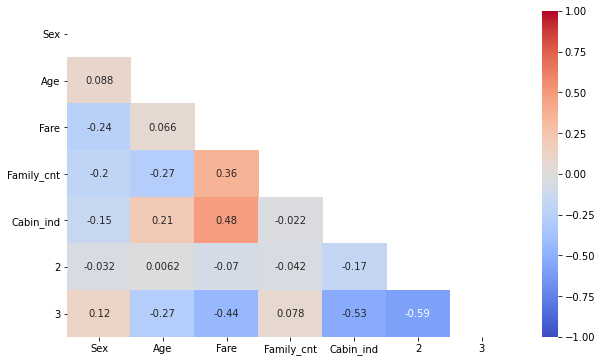

In [2]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
plt.figure(figsize=(10,6))
sns.heatmap(train_features.corr(), annot=True, fmt='.2', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)
plt.tight_layout

### GridSearchCV

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [4]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 16}

0.783 (+/-0.063) for {'max_depth': 2, 'n_estimators': 8}
0.801 (+/-0.077) for {'max_depth': 2, 'n_estimators': 16}
0.801 (+/-0.066) for {'max_depth': 2, 'n_estimators': 32}
0.791 (+/-0.093) for {'max_depth': 2, 'n_estimators': 64}
0.786 (+/-0.109) for {'max_depth': 2, 'n_estimators': 128}
0.793 (+/-0.093) for {'max_depth': 2, 'n_estimators': 256}
0.791 (+/-0.103) for {'max_depth': 2, 'n_estimators': 512}
0.819 (+/-0.072) for {'max_depth': 4, 'n_estimators': 8}
0.809 (+/-0.071) for {'max_depth': 4, 'n_estimators': 16}
0.814 (+/-0.101) for {'max_depth': 4, 'n_estimators': 32}
0.804 (+/-0.102) for {'max_depth': 4, 'n_estimators': 64}
0.815 (+/-0.098) for {'max_depth': 4, 'n_estimators': 128}
0.811 (+/-0.103) for {'max_depth': 4, 'n_estimators': 256}
0.802 (+/-0.119) for {'max_depth': 4, 'n_estimators': 512}
0.809 (+/-0.051) for {'max_depth': 8, 'n_estimators': 8}
0.819 (+/-0.092) for {'max_depth': 8, 'n_estimators': 16}
0.801 (+/-0.064) f

### Feature Importance

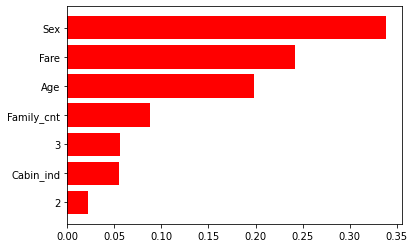

In [5]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [6]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_rf_tit_std.pkl')

['mdl_rf_tit_std.pkl']

### Read In Data

In [7]:
# Read test data
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

test_features = pd.read_csv('test_features_std.csv')
test_labels = pd.read_csv('test_labels_std.csv')

test_features.head()

,Sex,Age,Fare,Family_cnt,Cabin_ind,2,3
0,0.720772,0.032613,-0.168591,0.679441,-0.535901,-0.518497,0.877432
1,0.720772,0.134098,-0.455553,-0.589800,-0.535901,1.928652,-1.139690
2,0.720772,-0.724043,-0.658317,-0.589800,-0.535901,-0.518497,0.877432
3,-1.387401,-1.816223,0.498205,0.044821,-0.535901,1.928652,-1.139690
4,-1.387401,-1.192121,-0.404619,0.044821,-0.535901,-0.518497,0.877432


### Predicting On The Test Set

In [8]:
start = time()
pred = cv.best_estimator_.predict(test_features)
end = time()
accuracy = round(accuracy_score(test_labels, pred), 3)
precision = round(precision_score(test_labels, pred), 3)
recall = round(recall_score(test_labels, pred), 3)
print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(    accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

Accuracy: 0.772 / Precision: 0.784 / Recall: 0.622 / Latency: 6.0ms
